<a href="https://colab.research.google.com/github/Rishav-hub/Estimation-of-Simulated-Particles-in-Magnetron-Using-Image-Color-Detection/blob/main/Image_Color_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
LINK = '/content/drive/MyDrive/BE Final Year Project/image_Task_2/New folder (2)'

In [ ]:
import os
os.listdir(LINK)
# LINK+"/20ns.png"

['2ns.png',
 '4ns.png',
 '6ns.png',
 '8ns.png',
 '10ns.png',
 '12ns.png',
 '14ns.png',
 '16ns.png',
 '18ns.png',
 '20ns.png',
 'particle data.txt']

In [ ]:
# Imports
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read image
# imagePath = "D://opencvImages//"
img = cv2.imread(LINK+"/6ns.png")
# cv2_imshow(img)

# Here, you define your target color as
# a tuple of three values: RGB
green = [255, 0, 0]

# You define an interval that covers the values
# in the tuple and are below and above them by 20
diff = 140

# Be aware that opencv loads image in BGR format,
# that's why the color values have been adjusted here:
boundaries = [([green[2], green[1], green[0]-diff],
           [green[2], green[1], green[0]])]

# print(newSize)
print("#########################")
print(boundaries)

# check out the image resized:
# cv2_imshow(img)
print(img.shape)


#########################
[([0, 0, 115], [0, 0, 255])]
(601, 1086, 3)


[  0   0 105] [  0   0 255]
This is mask


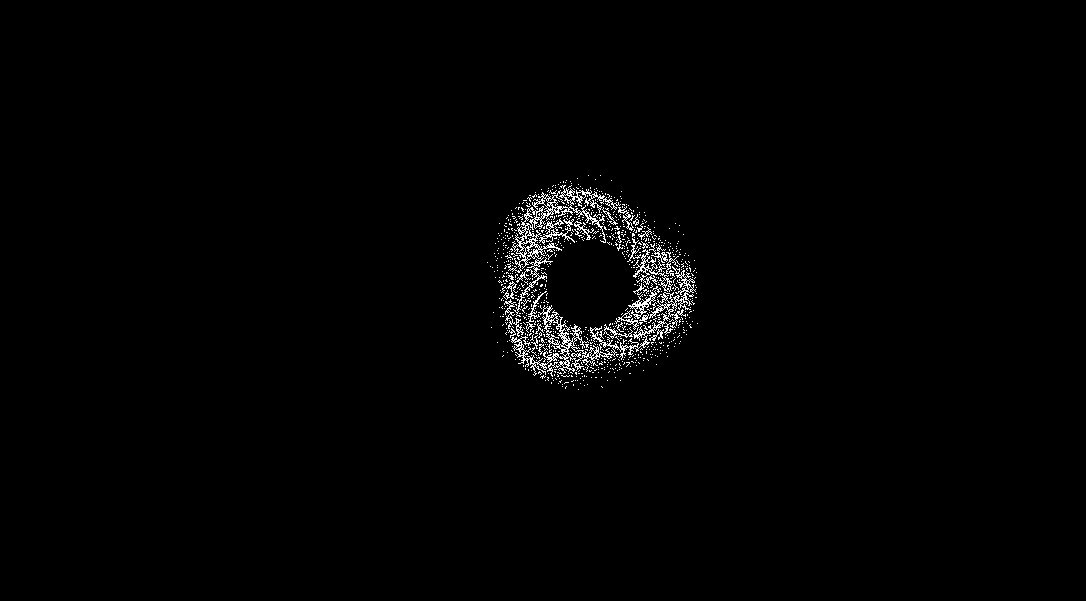

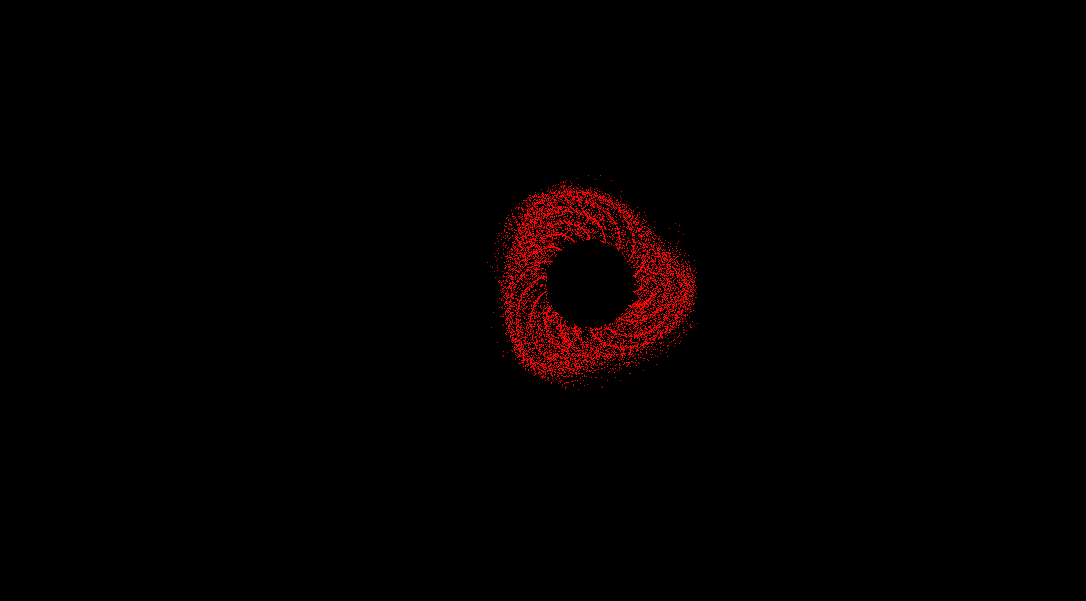

red pixel percentage: 1.3164


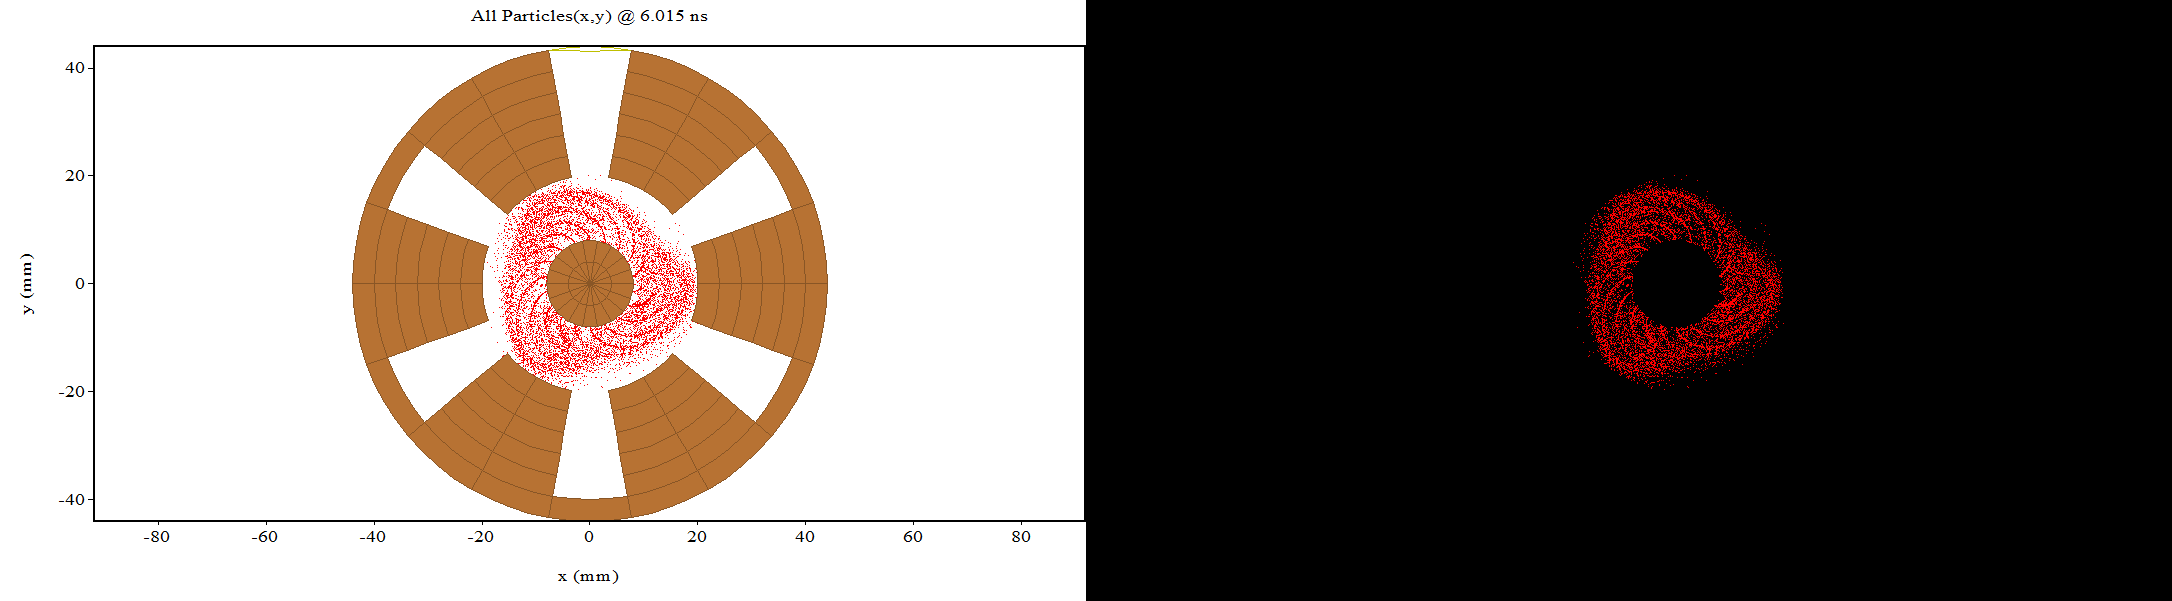

In [ ]:
for (lower, upper) in boundaries:

    # You get the lower and upper part of the interval:
    lower = np.array(lower, dtype=np.uint8)
    upper = np.array(upper, dtype=np.uint8)

    print(lower, upper)
    # cv2.inRange is used to binarize (i.e., render in white/black) an image
    # All the pixels that fall inside your interval [lower, uipper] will be white
    # All the pixels that do not fall inside this interval will
    # be rendered in black, for all three channels:
    mask = cv2.inRange(img, lower, upper)

    # Check out the binary mask:
    print("This is mask")
    cv2_imshow(mask)
    cv2.waitKey(0)

    # Now, you AND the mask and the input image
    # All the pixels that are white in the mask will
    # survive the AND operation, all the black pixels
    # will remain black
    output = cv2.bitwise_and(img, img, mask=mask)

    # Check out the ANDed mask:
    cv2_imshow(output)
    cv2.waitKey(0)

    # You can use the mask to count the number of white pixels.
    # Remember that the white pixels in the mask are those that
    # fall in your defined range, that is, every white pixel corresponds
    # to a green pixel. Divide by the image size and you got the
    # percentage of green pixels in the original image:
    ratio_red = cv2.countNonZero(mask)/(img.size/3)

    # This is the color percent calculation, considering the resize I did earlier.
    colorPercent = (ratio_red * 100) / 1

    # Print the color percent, use 2 figures past the decimal point
    print('red pixel percentage:', np.round(colorPercent, 4))

    # numpy's hstack is used to stack two images horizontally,
    # so you see the various images generated in one figure:
    cv2_imshow(np.hstack([img, output]))
    cv2.waitKey(0)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2

In [ ]:
image = cv2.imread(LINK+"/6ns.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.reshape((image.shape[0] * image.shape[1], 3))
clt = KMeans(n_clusters = 4)
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

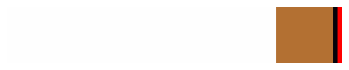

In [ ]:
hist = utils.centroid_histogram(clt)
bar = utils.plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [ ]:
clt.cluster_centers_

array([[ 2.54896016e+02,  2.54962133e+02,  2.54931657e+02],
       [ 1.79452939e+02,  1.12047220e+02,  5.01360895e+01],
       [ 3.56115400e+00,  3.51158066e+00,  1.03694975e+01],
       [ 2.55000000e+02,  3.64650532e-11, -1.99236183e-11]])

In [ ]:
for i in os.listdir(LINK):
  if "png" in str(i):
    image = cv2.imread(LINK+"/6ns.png")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    clt = KMeans(n_clusters = 4)
    clt.fit(image)

    hist = utils.centroid_histogram(clt)
    bar = utils.plot_colors(hist, clt.cluster_centers_)

    hist[3]



KeyboardInterrupt: ignored